In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Data Processing

In [6]:
cat_val = []
num_val = []

for column in df.columns:
    if df[column].nunique() <= 10:
        cat_val.append(column)
    else:
        num_val.append(column)

In [7]:
cat_val

['Outcome']

In [8]:
num_val

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

# Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
le = StandardScaler()

In [11]:
df[num_val] = le.fit_transform(df[num_val])

In [12]:
df[num_val]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


# Spliting Data into traning and test set

In [14]:
X = df.drop('Outcome',axis = 1)

In [15]:
y = df['Outcome']

In [16]:
X


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [17]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [21]:
log = LogisticRegression()

In [22]:
log.fit(X_train,y_train)

LogisticRegression()

In [23]:
y_pred1 = log.predict(X_test)
print('acc of LR is ',accuracy_score(y_test,y_pred1)*100)

acc of LR is  75.32467532467533


In [24]:
from sklearn import svm

In [25]:
svm = svm.SVC()

In [26]:
svm.fit(X_train,y_train)

SVC()

In [27]:
y_pred2 = svm.predict(X_test)

In [28]:
print('Accuracy of SVC algo is ',accuracy_score(y_test,y_pred2)*100)

Accuracy of SVC algo is  72.72727272727273


In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred3 = knn.predict(X_test)
print('Accuracy of KNeighborsClassifier algo is ',accuracy_score(y_test,y_pred3)*100)

Accuracy of KNeighborsClassifier algo is  68.83116883116884


In [31]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [32]:
y_pred4 = dt_clf.predict(X_test)

In [33]:
print('Accuracy of decision tree algo. is',accuracy_score(y_test,y_pred4)*100)

Accuracy of decision tree algo. is 73.37662337662337


In [34]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
y_pred5 = rf_clf.predict(X_test)

print('Accuracy of random forest algo. is',accuracy_score(y_test,y_pred5)*100)

Accuracy of random forest algo. is 74.02597402597402


In [40]:
acc_score = pd.DataFrame({'Models':['LR','SVC','KNC','DTC','RFC'],'ACC' : [
    accuracy_score(y_test,y_pred1)*100,
    accuracy_score(y_test,y_pred2)*100,
    accuracy_score(y_test,y_pred3)*100,
    accuracy_score(y_test,y_pred4)*100,
    accuracy_score(y_test,y_pred5)*100,
]})

In [41]:
acc_score

,Models,ACC
0,LR,75.324675
1,SVC,72.727273
2,KNC,68.831169
3,DTC,73.376623
4,RFC,74.025974


<Axes: xlabel='Models', ylabel='ACC'>

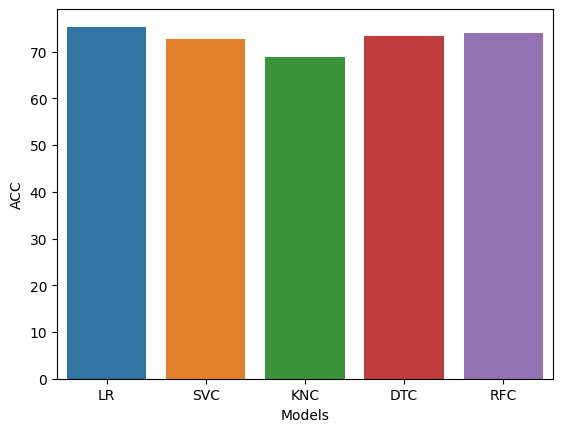

In [43]:
sns.barplot(data = df,x = acc_score['Models'],y = acc_score['ACC'])

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log = LogisticRegression()

In [45]:
log.fit(X,y)

LogisticRegression()

In [46]:
import joblib

In [47]:
joblib.dump(log,'model_joblib_diabetes')

['model_joblib_diabetes']

In [48]:
model = joblib.load('model_joblib_diabetes')

In [49]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [53]:
import tkinter as tk
import joblib

# Load the pre-trained model
model = joblib.load('model_joblib_diabetes')

# Function to flash a color on a widget
def flash_widget(widget, color, duration=200):
    original_bg = widget.cget("bg")
    widget.config(bg=color)
    widget.after(duration, lambda: widget.config(bg=original_bg))

# Create a function to predict heart disease
def predict_heart_disease():
    try:
        # Get the input values
        Pregnancies = float(entry_widgets['Pregnancies'].get())
        Glucose = float(entry_widgets['Glucose'].get())
        BloodPressure = float(entry_widgets['BloodPressure'].get())
        SkinThickness = float(entry_widgets['SkinThickness'].get())
        Insulin = float(entry_widgets['Insulin'].get())
        BMI = float(entry_widgets['BMI'].get())
        DiabetesPedigreeFunction = float(entry_widgets['DiabetesPedigreeFunction'].get())
        Age = float(entry_widgets['Age'].get())

        # Create a numpy array with the input data
        input_data = np.array([[Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age]])

        # Make a prediction using the loaded model
        prediction = model.predict(input_data)

        # Display the prediction with animation
        if prediction[0] == 0:
            prediction_label.config(text="No Diabetes", fg="green")
            flash_widget(prediction_label, "green")
        else:
            prediction_label.config(text="Diabetes", fg="red")
            flash_widget(prediction_label, "red")
    except ValueError:
        prediction_label.config(text="Invalid input", fg="black")
        flash_widget(prediction_label, "black")

# Create the main window
root = tk.Tk()
root.title("Diabetes Prediction")


# Create labels and entry widgets for each column
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']

entry_widgets = {}  # Dictionary to store entry widgets

for i, col in enumerate(columns):
    label = tk.Label(root, text=col.capitalize() + ":")
    label.grid(row=i, column=0, padx=10, pady=5)
    entry = tk.Entry(root, bg="lightblue")  # Color the entry fields
    entry.grid(row=i, column=1, padx=10, pady=5)
    entry_widgets[col] = entry  # Store the entry widget in the dictionary

# Create a Predict button with animation
predict_button = tk.Button(root, text="Predict", command=predict_heart_disease, bg="orange", fg="white")
predict_button.grid(row=len(columns), columnspan=2, pady=10)
flash_widget(predict_button, "orange", 1000)

# Create a label to display the prediction result with animation
prediction_label = tk.Label(root, text="", fg="black", font=("Helvetica", 16))
prediction_label.grid(row=len(columns) + 1, columnspan=2, pady=10)

# Run the GUI main loop
root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\VAIBHAV SHARMA\AppData\Local\Programs\Python\Python310\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\VAIBHAV SHARMA\AppData\Local\Temp\ipykernel_2548\3141100060.py", line 26, in predict_heart_disease
    input_data = np.array([[Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction]])
NameError: name 'Pregnancies' is not defined


In [ ]:
6,148,72,35,0,33.6,0.627,50,1